# Grid Search
brute force to find best hyperparameter values

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
telco = pd.read_csv('../DATASETS/Churn.csv')

telco['Intl_Plan'].replace({'no':0, 'yes':1}, inplace=True)
telco['Vmail_Plan'].replace({'no':0, 'yes':1}, inplace=True)
telco['Churn'].replace({'no':0, 'yes':1}, inplace=True)

In [2]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [3]:
#features = ['Day_Mins','Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Day_Charge'] 
features = ['Account_Length', 'Vmail_Message', 'Day_Mins' ,'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 
            'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge','Night_Calls', 'Night_Charge', 
            'Intl_Calls', 'Intl_Charge']

X = telco[features]
y = telco['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [4]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()
#clf.fit(X_train, y_train)
print(clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
param_grid = {'max_features':['auto', 'sqrt', 'log2']}

In [7]:
grid_search = GridSearchCV(clf, param_grid)

In [8]:
grid_search.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [9]:
print(grid_search.best_params_)

{'max_features': 'sqrt'}


In [10]:
print(len(X))

3333


In [11]:
X.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls',
       'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge',
       'Intl_Calls', 'Intl_Charge'],
      dtype='object')

In [12]:
print(grid_search)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [14]:
# Import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
random_search = RandomizedSearchCV(clf, param_grid)
random_search.fit(X,y)
print(random_search.best_params_)

{'max_features': 3, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}


# feature importances

In [16]:
clf = RandomForestClassifier(**random_search.best_params_)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:

clf.feature_importances_

array([0.0328488 , 0.02632548, 0.13884712, 0.0681986 , 0.04072824,
       0.04887235, 0.11567375, 0.06837456, 0.02218867, 0.03540104,
       0.13680488, 0.0305643 , 0.06696058, 0.03292604, 0.03975797,
       0.04580169, 0.04972595])

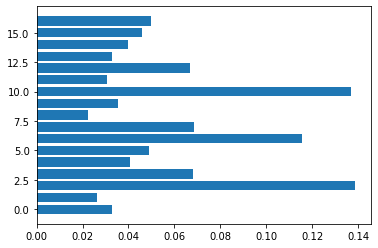

In [19]:
import matplotlib.pyplot as plt
plt.barh(range(X.shape[1]), clf.feature_importances_)
plt.show()

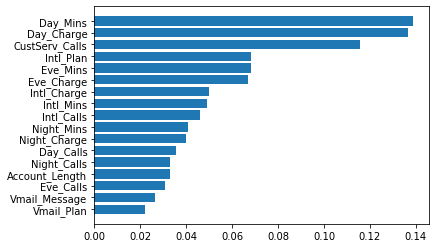

In [23]:
import numpy as np
sorted_index = np.argsort(clf.feature_importances_)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), clf.feature_importances_[sorted_index], tick_label=labels)
plt.show()

# adding new features